# Dataset: 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, \
preprocessing, model_selection, pipeline, metrics

import matplotlib.pyplot as plt

import seaborn as sns

pd.options.display.max_columns = 1000

%matplotlib inline

In [2]:
df = pd.read_csv("/data/kaggle/house-prices/data_combined_cleaned.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non

In [5]:
del df["Id"]
df = df[~df.SalesPrice.isnull()]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [7]:
target = "SalesPrice"
y = np.log(df[target].values)
X = pd.get_dummies(df.drop(columns=[target]), drop_first=True).values

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)

train_r2 = metrics.r2_score(y_train, y_train_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

print("MSE: train: %f, test: %f" % (train_mse, test_mse))
print("R2: train: %f, test: %f" % (train_r2, test_r2))


MSE: train: 0.007408, test: 897715180337556750336.000000
R2: train: 0.949453, test: -4750079859651933896704.000000


In [9]:
target = "SalesPrice"
y = np.log(df[target].values)
X = pd.get_dummies(df.drop(columns=[target]), drop_first=True).values

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(alpha=0.1,
                                      random_state=1,
                                      l1_ratio=1,
                                      max_iter=1000))
])



pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)

train_r2 = metrics.r2_score(y_train, y_train_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

print("MSE: train: %f, test: %f" % (train_mse, test_mse))
print("R2: train: %f, test: %f" % (train_r2, test_r2))


MSE: train: 0.010006, test: 0.024337
R2: train: 0.931719, test: 0.871224


In [17]:
scores = model_selection.cross_val_score(pipe, X, y
                            ,cv = 5, scoring="neg_mean_squared_error")

In [18]:
- scores, - np.mean(scores)

(array([0.01645286, 0.02446447, 0.02244619, 0.01567544, 0.03392212]),
 0.022592214768555725)

In [48]:
np.random.ranf(10) * 0.1 - 0.08

array([-0.00734588, -0.0776037 , -0.00351548, -0.0578253 , -0.04246036,
       -0.07457748, -0.07503271, -0.07972384, -0.07982775,  0.00204051])

In [52]:
%%time 

param_grid = {
    "est__alpha": np.random.ranf(10) * 0.001 - 0.08,
    #"est__l1_ratio": np.linspace(0.001, .999, 10)
}

gs = model_selection.GridSearchCV(pipe
                                  , param_grid
                                  , scoring="neg_mean_squared_error"
                                  , cv = 5
                                  , n_jobs = 6)
gs.fit(X_train, y_train)

y_test_pred = gs.predict(X_test)
print("test mse:", metrics.mean_squared_error(y_test, y_test_pred), 
      "best params", gs.best_params_)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x102dc6780, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/abulbasar/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/abulbasar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/abulb.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x102dc6780, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/abulbasar/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/abulbasar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/abulb.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '%%time \n\nparam_grid = {\n    "est__alpha": np.ran...est_pred), \n      "best params", gs.best_params_)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 8, 10, 46, 57, 745745, tzinfo=tzutc()), 'msg_id': '445f54e69fd14c16804fbeb71fb12a46', 'msg_type': 'execute_request', 'session': 'c677b628a7544966b801fc7c9833bb95', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '445f54e69fd14c16804fbeb71fb12a46', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'c677b628a7544966b801fc7c9833bb95']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '%%time \n\nparam_grid = {\n    "est__alpha": np.ran...est_pred), \n      "best params", gs.best_params_)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 8, 10, 46, 57, 745745, tzinfo=tzutc()), 'msg_id': '445f54e69fd14c16804fbeb71fb12a46', 'msg_type': 'execute_request', 'session': 'c677b628a7544966b801fc7c9833bb95', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '445f54e69fd14c16804fbeb71fb12a46', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'c677b628a7544966b801fc7c9833bb95'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '%%time \n\nparam_grid = {\n    "est__alpha": np.ran...est_pred), \n      "best params", gs.best_params_)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 8, 10, 46, 57, 745745, tzinfo=tzutc()), 'msg_id': '445f54e69fd14c16804fbeb71fb12a46', 'msg_type': 'execute_request', 'session': 'c677b628a7544966b801fc7c9833bb95', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '445f54e69fd14c16804fbeb71fb12a46', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='%%time \n\nparam_grid = {\n    "est__alpha": np.ran...est_pred), \n      "best params", gs.best_params_)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '%%time \n\nparam_grid = {\n    "est__alpha": np.ran...est_pred), \n      "best params", gs.best_params_)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('%%time \n\nparam_grid = {\n    "est__alpha": np.ran...est_pred), \n      "best params", gs.best_params_)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('%%time \n\nparam_grid = {\n    "est__alpha": np.ran...est_pred), \n      "best params", gs.best_params_)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='%%time \n\nparam_grid = {\n    "est__alpha": np.ran...est_pred), \n      "best params", gs.best_params_)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = '%%time \n\nparam_grid = {\n    "est__alpha": np.ran...est_pred), \n      "best params", gs.best_params_)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='%%time \n\nparam_grid = {\n    "est__alpha": np.ran...est_pred), \n      "best params", gs.best_params_)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-52-72866612cc9d>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1a0ada4780, execution...rue silent=False shell_futures=True> result=None>)
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])
   2908                 code = compiler(mod, cell_name, "single")
-> 2909                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1a0b49c390, file "<ipython-input-52-72866612cc9d>", line 1>
        result = <ExecutionResult object at 1a0ada4780, execution...rue silent=False shell_futures=True> result=None>
   2910                     return True
   2911 
   2912             # Flush softspace
   2913             if softspace(sys.stdout, 0):

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1a0b49c390, file "<ipython-input-52-72866612cc9d>", line 1>, result=<ExecutionResult object at 1a0ada4780, execution...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1a0b49c390, file "<ipython-input-52-72866612cc9d>", line 1>
        self.user_global_ns = {'In': ['', "import pandas as pd\nimport numpy as np\nfrom skle..._ipython().run_line_magic('matplotlib', 'inline')", 'df = pd.read_csv("/data/kaggle/house-prices/data_combined_cleaned.csv")', 'df.head()', 'df.info()', 'del df["Id"]\ndf = df[~df.SalesPrice.isnull()]', 'df.info()', 'target = "SalesPrice"\ny = np.log(df[target].valu...("R2: train: %f, test: %f" % (train_r2, test_r2))', 'target = "SalesPrice"\ny = np.log(df[target].valu...("R2: train: %f, test: %f" % (train_r2, test_r2))', 'target = "SalesPrice"\ny = np.log(df[target].valu...("R2: train: %f, test: %f" % (train_r2, test_r2))', 'scores = model_selection.cross_val_score(pipe, X_train, y_train, cv = 5)', 'scores, np.mean(scores)', 'scores = model_selection.cross_val_score(pipe, X_train, y_train, cv = 5, scoring="r2")', 'scores = model_selection.cross_val_score(pipe, X_train, y_train, cv = 5, scoring="rmse")', 'scores = model_selection.cross_val_score(pipe, X...       ,cv = 5, scoring="neg_mean_squared_error")', 'scores, np.mean(scores)', '- scores, - np.mean(scores)', 'scores = model_selection.cross_val_score(pipe, X...       ,cv = 5, scoring="neg_mean_squared_error")', '- scores, - np.mean(scores)', 'np.linspace(-2, 3, 10)', ...], 'Out': {3:    Id  MSSubClass MSZoning  LotFrontage  LotArea...norml    140000.0  
4        Normal    250000.0  , 11: (array([0.59650982, 0.88415115, 0.79781046, 0.85160278, 0.91562434]), 0.809139706487558), 15: (array([-0.05776951, -0.01689846, -0.03377931, -0.01813455, -0.01296278]), -0.02790892412270173), 16: (array([0.05776951, 0.01689846, 0.03377931, 0.01813455, 0.01296278]), 0.02790892412270173), 18: (array([0.01645286, 0.02446447, 0.02244619, 0.01567544, 0.03392212]), 0.022592214768555725), 19: array([-2.        , -1.44444444, -0.88888889, -0...33333333,  1.88888889,  2.44444444,  3.        ]), 20: array([1.00000000e-02, 3.59381366e-02, 1.2915496...3683e+01,
       2.78255940e+02, 1.00000000e+03]), 21: array([0.001     , 0.11188889, 0.22277778, 0.333... 0.66633333, 0.77722222, 0.88811111, 0.999     ]), 26: {'est__alpha': 0.464158883361278, 'est__l1_ratio': 0.001}, 27: -0.025357432012332176, ...}, 'X': array([[6.000e+01, 6.500e+01, 8.450e+03, ..., 0...., ..., 0.000e+00, 1.000e+00,
        0.000e+00]]), 'X_test': array([[6.0000e+01, 8.0000e+01, 1.2435e+04, ...,....., 0.0000e+00, 0.0000e+00,
        0.0000e+00]]), 'X_train': array([[2.0000e+01, 8.5000e+01, 1.1900e+04, ...,....., 0.0000e+00, 1.0000e+00,
        0.0000e+00]]), '_': array([-0.00734588, -0.0776037 , -0.00351548, -0...07503271, -0.07972384, -0.07982775,  0.00204051]), '_11': (array([0.59650982, 0.88415115, 0.79781046, 0.85160278, 0.91562434]), 0.809139706487558), '_15': (array([-0.05776951, -0.01689846, -0.03377931, -0.01813455, -0.01296278]), -0.02790892412270173), '_16': (array([0.05776951, 0.01689846, 0.03377931, 0.01813455, 0.01296278]), 0.02790892412270173), '_18': (array([0.01645286, 0.02446447, 0.02244619, 0.01567544, 0.03392212]), 0.022592214768555725), ...}
        self.user_ns = {'In': ['', "import pandas as pd\nimport numpy as np\nfrom skle..._ipython().run_line_magic('matplotlib', 'inline')", 'df = pd.read_csv("/data/kaggle/house-prices/data_combined_cleaned.csv")', 'df.head()', 'df.info()', 'del df["Id"]\ndf = df[~df.SalesPrice.isnull()]', 'df.info()', 'target = "SalesPrice"\ny = np.log(df[target].valu...("R2: train: %f, test: %f" % (train_r2, test_r2))', 'target = "SalesPrice"\ny = np.log(df[target].valu...("R2: train: %f, test: %f" % (train_r2, test_r2))', 'target = "SalesPrice"\ny = np.log(df[target].valu...("R2: train: %f, test: %f" % (train_r2, test_r2))', 'scores = model_selection.cross_val_score(pipe, X_train, y_train, cv = 5)', 'scores, np.mean(scores)', 'scores = model_selection.cross_val_score(pipe, X_train, y_train, cv = 5, scoring="r2")', 'scores = model_selection.cross_val_score(pipe, X_train, y_train, cv = 5, scoring="rmse")', 'scores = model_selection.cross_val_score(pipe, X...       ,cv = 5, scoring="neg_mean_squared_error")', 'scores, np.mean(scores)', '- scores, - np.mean(scores)', 'scores = model_selection.cross_val_score(pipe, X...       ,cv = 5, scoring="neg_mean_squared_error")', '- scores, - np.mean(scores)', 'np.linspace(-2, 3, 10)', ...], 'Out': {3:    Id  MSSubClass MSZoning  LotFrontage  LotArea...norml    140000.0  
4        Normal    250000.0  , 11: (array([0.59650982, 0.88415115, 0.79781046, 0.85160278, 0.91562434]), 0.809139706487558), 15: (array([-0.05776951, -0.01689846, -0.03377931, -0.01813455, -0.01296278]), -0.02790892412270173), 16: (array([0.05776951, 0.01689846, 0.03377931, 0.01813455, 0.01296278]), 0.02790892412270173), 18: (array([0.01645286, 0.02446447, 0.02244619, 0.01567544, 0.03392212]), 0.022592214768555725), 19: array([-2.        , -1.44444444, -0.88888889, -0...33333333,  1.88888889,  2.44444444,  3.        ]), 20: array([1.00000000e-02, 3.59381366e-02, 1.2915496...3683e+01,
       2.78255940e+02, 1.00000000e+03]), 21: array([0.001     , 0.11188889, 0.22277778, 0.333... 0.66633333, 0.77722222, 0.88811111, 0.999     ]), 26: {'est__alpha': 0.464158883361278, 'est__l1_ratio': 0.001}, 27: -0.025357432012332176, ...}, 'X': array([[6.000e+01, 6.500e+01, 8.450e+03, ..., 0...., ..., 0.000e+00, 1.000e+00,
        0.000e+00]]), 'X_test': array([[6.0000e+01, 8.0000e+01, 1.2435e+04, ...,....., 0.0000e+00, 0.0000e+00,
        0.0000e+00]]), 'X_train': array([[2.0000e+01, 8.5000e+01, 1.1900e+04, ...,....., 0.0000e+00, 1.0000e+00,
        0.0000e+00]]), '_': array([-0.00734588, -0.0776037 , -0.00351548, -0...07503271, -0.07972384, -0.07982775,  0.00204051]), '_11': (array([0.59650982, 0.88415115, 0.79781046, 0.85160278, 0.91562434]), 0.809139706487558), '_15': (array([-0.05776951, -0.01689846, -0.03377931, -0.01813455, -0.01296278]), -0.02790892412270173), '_16': (array([0.05776951, 0.01689846, 0.03377931, 0.01813455, 0.01296278]), 0.02790892412270173), '_18': (array([0.01645286, 0.02446447, 0.02244619, 0.01567544, 0.03392212]), 0.022592214768555725), ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
/Users/abulbasar/workspace/python/machine-learning/demos/<ipython-input-52-72866612cc9d> in <module>()
----> 1 get_ipython().run_cell_magic('time', '', '\nparam_grid = {\n    "est__alpha": np.random.ranf(10) * 0.001 - 0.08,\n    #"est__l1_ratio": np.linspace(0.001, .999, 10)\n}\n\ngs = model_selection.GridSearchCV(pipe\n                                  , param_grid\n                                  , scoring="neg_mean_squared_error"\n                                  , cv = 5\n                                  , n_jobs = 6)\ngs.fit(X_train, y_train)\n\ny_test_pred = gs.predict(X_test)\nprint("test mse:", metrics.mean_squared_error(y_test, y_test_pred), \n      "best params", gs.best_params_)')

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell_magic(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, magic_name='time', line='', cell='\nparam_grid = {\n    "est__alpha": np.random.ranf...est_pred), \n      "best params", gs.best_params_)')
   2162             # This will need to be updated if the internal calling logic gets
   2163             # refactored, or else we'll be expanding the wrong variables.
   2164             stack_depth = 2
   2165             magic_arg_s = self.var_expand(line, stack_depth)
   2166             with self.builtin_trap:
-> 2167                 result = fn(magic_arg_s, cell)
        result = undefined
        fn = <bound method ExecutionMagics.time of <IPython.core.magics.execution.ExecutionMagics object>>
        magic_arg_s = ''
        cell = '\nparam_grid = {\n    "est__alpha": np.random.ranf...est_pred), \n      "best params", gs.best_params_)'
   2168             return result
   2169 
   2170     def find_line_magic(self, magic_name):
   2171         """Find and return a line magic by name.

...........................................................................
/Users/abulbasar/workspace/python/machine-learning/demos/<decorator-gen-62> in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line='', cell='\nparam_grid = {\n    "est__alpha": np.random.ranf...est_pred), \n      "best params", gs.best_params_)', local_ns=None)

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/IPython/core/magic.py in <lambda>(f=<function ExecutionMagics.time>, *a=(<IPython.core.magics.execution.ExecutionMagics object>, '', '\nparam_grid = {\n    "est__alpha": np.random.ranf...est_pred), \n      "best params", gs.best_params_)', None), **k={})
    182     validate_type(magic_kind)
    183 
    184     # This is a closure to capture the magic_kind.  We could also use a class,
    185     # but it's overkill for just that one bit of state.
    186     def magic_deco(arg):
--> 187         call = lambda f, *a, **k: f(*a, **k)
        f = <function ExecutionMagics.time>
        a = (<IPython.core.magics.execution.ExecutionMagics object>, '', '\nparam_grid = {\n    "est__alpha": np.random.ranf...est_pred), \n      "best params", gs.best_params_)', None)
        k = {}
    188 
    189         if callable(arg):
    190             # "Naked" decorator call (just @foo, no args)
    191             func = arg

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/IPython/core/magics/execution.py in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line='', cell='\nparam_grid = {\n    "est__alpha": np.random.ranf...est_pred), \n      "best params", gs.best_params_)', local_ns=None)
   1233                 return
   1234             end = clock2()
   1235         else:
   1236             st = clock2()
   1237             try:
-> 1238                 exec(code, glob, local_ns)
        code = <code object <module> at 0x1a0b49c420, file "<timed exec>", line 3>
        glob = {'In': ['', "import pandas as pd\nimport numpy as np\nfrom skle..._ipython().run_line_magic('matplotlib', 'inline')", 'df = pd.read_csv("/data/kaggle/house-prices/data_combined_cleaned.csv")', 'df.head()', 'df.info()', 'del df["Id"]\ndf = df[~df.SalesPrice.isnull()]', 'df.info()', 'target = "SalesPrice"\ny = np.log(df[target].valu...("R2: train: %f, test: %f" % (train_r2, test_r2))', 'target = "SalesPrice"\ny = np.log(df[target].valu...("R2: train: %f, test: %f" % (train_r2, test_r2))', 'target = "SalesPrice"\ny = np.log(df[target].valu...("R2: train: %f, test: %f" % (train_r2, test_r2))', 'scores = model_selection.cross_val_score(pipe, X_train, y_train, cv = 5)', 'scores, np.mean(scores)', 'scores = model_selection.cross_val_score(pipe, X_train, y_train, cv = 5, scoring="r2")', 'scores = model_selection.cross_val_score(pipe, X_train, y_train, cv = 5, scoring="rmse")', 'scores = model_selection.cross_val_score(pipe, X...       ,cv = 5, scoring="neg_mean_squared_error")', 'scores, np.mean(scores)', '- scores, - np.mean(scores)', 'scores = model_selection.cross_val_score(pipe, X...       ,cv = 5, scoring="neg_mean_squared_error")', '- scores, - np.mean(scores)', 'np.linspace(-2, 3, 10)', ...], 'Out': {3:    Id  MSSubClass MSZoning  LotFrontage  LotArea...norml    140000.0  
4        Normal    250000.0  , 11: (array([0.59650982, 0.88415115, 0.79781046, 0.85160278, 0.91562434]), 0.809139706487558), 15: (array([-0.05776951, -0.01689846, -0.03377931, -0.01813455, -0.01296278]), -0.02790892412270173), 16: (array([0.05776951, 0.01689846, 0.03377931, 0.01813455, 0.01296278]), 0.02790892412270173), 18: (array([0.01645286, 0.02446447, 0.02244619, 0.01567544, 0.03392212]), 0.022592214768555725), 19: array([-2.        , -1.44444444, -0.88888889, -0...33333333,  1.88888889,  2.44444444,  3.        ]), 20: array([1.00000000e-02, 3.59381366e-02, 1.2915496...3683e+01,
       2.78255940e+02, 1.00000000e+03]), 21: array([0.001     , 0.11188889, 0.22277778, 0.333... 0.66633333, 0.77722222, 0.88811111, 0.999     ]), 26: {'est__alpha': 0.464158883361278, 'est__l1_ratio': 0.001}, 27: -0.025357432012332176, ...}, 'X': array([[6.000e+01, 6.500e+01, 8.450e+03, ..., 0...., ..., 0.000e+00, 1.000e+00,
        0.000e+00]]), 'X_test': array([[6.0000e+01, 8.0000e+01, 1.2435e+04, ...,....., 0.0000e+00, 0.0000e+00,
        0.0000e+00]]), 'X_train': array([[2.0000e+01, 8.5000e+01, 1.1900e+04, ...,....., 0.0000e+00, 1.0000e+00,
        0.0000e+00]]), '_': array([-0.00734588, -0.0776037 , -0.00351548, -0...07503271, -0.07972384, -0.07982775,  0.00204051]), '_11': (array([0.59650982, 0.88415115, 0.79781046, 0.85160278, 0.91562434]), 0.809139706487558), '_15': (array([-0.05776951, -0.01689846, -0.03377931, -0.01813455, -0.01296278]), -0.02790892412270173), '_16': (array([0.05776951, 0.01689846, 0.03377931, 0.01813455, 0.01296278]), 0.02790892412270173), '_18': (array([0.01645286, 0.02446447, 0.02244619, 0.01567544, 0.03392212]), 0.022592214768555725), ...}
        local_ns = None
   1239             except:
   1240                 self.shell.showtraceback()
   1241                 return
   1242             end = clock2()

...........................................................................
/Users/abulbasar/workspace/python/machine-learning/demos/<timed exec> in <module>()

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=5, error_score='raise',
       e...     scoring='neg_mean_squared_error', verbose=0), X=array([[2.0000e+01, 8.5000e+01, 1.1900e+04, ...,....., 0.0000e+00, 1.0000e+00,
        0.0000e+00]]), y=array([11.32055357, 12.53177279, 11.74799759, ..., 11.75194237,
       11.4019939 , 11.30220443]), groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=5, random_state=None, shuffle=False)>
        X = array([[2.0000e+01, 8.5000e+01, 1.1900e+04, ...,....., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])
        y = array([11.32055357, 12.53177279, 11.74799759, ..., 11.75194237,
       11.4019939 , 11.30220443])
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=6), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=6)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Tue May  8 16:16:57 2018
PID: 1922               Python 3.6.5: /Users/abulbasar/anaconda3/bin/python
...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('scaler', Sta...e=True, tol=None, verbose=0, warm_start=False))]), memmap([[2.0000e+01, 8.5000e+01, 1.1900e+04, ......., 0.0000e+00, 1.0000e+00,
         0.0000e+00]]), array([11.32055357, 12.53177279, 11.74799759, ..., 11.75194237,
       11.4019939 , 11.30220443]), {'score': make_scorer(mean_squared_error, greater_is_better=False)}, array([ 205,  206,  207,  208,  209,  210,  211,...1015, 1016, 1017, 1018,
       1019, 1020, 1021]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...95, 196, 197, 198, 199, 200, 201, 202, 203, 204]), 0, {'est__alpha': -0.07930973729631029}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('scaler', Sta...e=True, tol=None, verbose=0, warm_start=False))]), memmap([[2.0000e+01, 8.5000e+01, 1.1900e+04, ......., 0.0000e+00, 1.0000e+00,
         0.0000e+00]]), array([11.32055357, 12.53177279, 11.74799759, ..., 11.75194237,
       11.4019939 , 11.30220443]), {'score': make_scorer(mean_squared_error, greater_is_better=False)}, array([ 205,  206,  207,  208,  209,  210,  211,...1015, 1016, 1017, 1018,
       1019, 1020, 1021]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...95, 196, 197, 198, 199, 200, 201, 202, 203, 204]), 0, {'est__alpha': -0.07930973729631029})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('scaler', Sta...e=True, tol=None, verbose=0, warm_start=False))]), X=memmap([[2.0000e+01, 8.5000e+01, 1.1900e+04, ......., 0.0000e+00, 1.0000e+00,
         0.0000e+00]]), y=array([11.32055357, 12.53177279, 11.74799759, ..., 11.75194237,
       11.4019939 , 11.30220443]), scorer={'score': make_scorer(mean_squared_error, greater_is_better=False)}, train=array([ 205,  206,  207,  208,  209,  210,  211,...1015, 1016, 1017, 1018,
       1019, 1020, 1021]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...95, 196, 197, 198, 199, 200, 201, 202, 203, 204]), verbose=0, parameters={'est__alpha': -0.07930973729631029}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method Pipeline.set_params of Pipeline(me...=True, tol=None, verbose=0, warm_start=False))])>
        parameters = {'est__alpha': -0.07930973729631029}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py in set_params(self=Pipeline(memory=None,
     steps=[('scaler', Sta...e=True, tol=None, verbose=0, warm_start=False))]), **kwargs={'est__alpha': -0.07930973729631029})
    137 
    138         Returns
    139         -------
    140         self
    141         """
--> 142         self._set_params('steps', **kwargs)
        self._set_params = <bound method _BaseComposition._set_params of Pi...=True, tol=None, verbose=0, warm_start=False))])>
        kwargs = {'est__alpha': -0.07930973729631029}
    143         return self
    144 
    145     def _validate_steps(self):
    146         names, estimators = zip(*self.steps)

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/utils/metaestimators.py in _set_params(self=Pipeline(memory=None,
     steps=[('scaler', Sta...e=True, tol=None, verbose=0, warm_start=False))]), attr='steps', **params={'est__alpha': -0.07930973729631029})
     44         names, _ = zip(*getattr(self, attr))
     45         for name in list(six.iterkeys(params)):
     46             if '__' not in name and name in names:
     47                 self._replace_estimator(attr, name, params.pop(name))
     48         # 3. Step parameters and other initilisation arguments
---> 49         super(_BaseComposition, self).set_params(**params)
        self.set_params = <bound method Pipeline.set_params of Pipeline(me...=True, tol=None, verbose=0, warm_start=False))])>
        params = {'est__alpha': -0.07930973729631029}
     50         return self
     51 
     52     def _replace_estimator(self, attr, name, new_val):
     53         # assumes `name` is a valid estimator name

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/base.py in set_params(self=Pipeline(memory=None,
     steps=[('scaler', Sta...e=True, tol=None, verbose=0, warm_start=False))]), **params={'est__alpha': -0.07930973729631029})
    277                 nested_params[key][sub_key] = value
    278             else:
    279                 setattr(self, key, value)
    280 
    281         for key, sub_params in nested_params.items():
--> 282             valid_params[key].set_params(**sub_params)
        valid_params = {'est': SGDRegressor(alpha=-0.07930973729631029, average...ffle=True, tol=None, verbose=0, warm_start=False), 'est__alpha': 0.1, 'est__average': False, 'est__epsilon': 0.1, 'est__eta0': 0.01, 'est__fit_intercept': True, 'est__l1_ratio': 1, 'est__learning_rate': 'invscaling', 'est__loss': 'squared_loss', 'est__max_iter': 1000, ...}
        key.set_params = undefined
        sub_params = {'alpha': -0.07930973729631029}
    283 
    284         return self
    285 
    286     def __repr__(self):

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py in set_params(self=SGDRegressor(alpha=-0.07930973729631029, average...ffle=True, tol=None, verbose=0, warm_start=False), *args=(), **kwargs={'alpha': -0.07930973729631029})
     73         # but we are not allowed to set attributes
     74         self._validate_params(set_max_iter=False)
     75 
     76     def set_params(self, *args, **kwargs):
     77         super(BaseSGD, self).set_params(*args, **kwargs)
---> 78         self._validate_params(set_max_iter=False)
        self._validate_params = <bound method BaseSGD._validate_params of SGDReg...fle=True, tol=None, verbose=0, warm_start=False)>
     79         return self
     80 
     81     @abstractmethod
     82     def fit(self, X, y):

...........................................................................
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py in _validate_params(self=SGDRegressor(alpha=-0.07930973729631029, average...ffle=True, tol=None, verbose=0, warm_start=False), set_max_iter=False)
     89         if self.max_iter is not None and self.max_iter <= 0:
     90             raise ValueError("max_iter must be > zero. Got %f" % self.max_iter)
     91         if not (0.0 <= self.l1_ratio <= 1.0):
     92             raise ValueError("l1_ratio must be in [0, 1]")
     93         if self.alpha < 0.0:
---> 94             raise ValueError("alpha must be >= 0")
     95         if self.learning_rate in ("constant", "invscaling"):
     96             if self.eta0 <= 0.0:
     97                 raise ValueError("eta0 must be > 0")
     98         if self.learning_rate == "optimal" and self.alpha == 0:

ValueError: alpha must be >= 0
___________________________________________________________________________

In [20]:
10 ** np.linspace(-2, 3, 10)

array([1.00000000e-02, 3.59381366e-02, 1.29154967e-01, 4.64158883e-01,
       1.66810054e+00, 5.99484250e+00, 2.15443469e+01, 7.74263683e+01,
       2.78255940e+02, 1.00000000e+03])

In [21]:
np.linspace(0.001, .999, 10)

array([0.001     , 0.11188889, 0.22277778, 0.33366667, 0.44455556,
       0.55544444, 0.66633333, 0.77722222, 0.88811111, 0.999     ])

In [46]:
gs.best_params_

{'est__alpha': 0.08143526635006904}

In [27]:
gs.best_score_

-0.025357432012332176

In [28]:
est = gs.best_estimator_

In [ ]:
gs.predict

In [29]:
y_test_pred = est.predict(X_test)

In [30]:
metrics.mean_squared_error(y_test, y_test_pred)

0.026692186569052805

In [39]:
y_test_pred = gs.predict(X_test)
metrics.mean_squared_error(y_test, y_test_pred)

0.027808286675254593

In [31]:
import pickle

In [34]:
with open("/tmp/kaggle_house.pickle","wb") as f:
    pickle.dump(gs, f)

In [35]:
with open("/tmp/kaggle_house.pickle","rb") as f:
    model = pickle.load(f)

In [36]:
y_test_pred = model.predict(X_test)
metrics.mean_squared_error(y_test, y_test_pred)

0.026692186569052805

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 4., 1., 1., 0., 2.,
        3., 8., 4., 3., 3., 4., 3., 4., 2., 6., 2., 4., 3., 6., 4., 5., 2.,
        1., 3., 2., 1., 1., 3., 1., 2., 4., 1., 1., 1., 0., 0., 0., 1.]),
 array([-2.23300624, -2.12747128, -2.02193633, -1.91640137, -1.81086641,
        -1.70533146, -1.5997965 , -1.49426154, -1.38872658, -1.28319163,
        -1.17765667, -1.07212171, -0.96658676, -0.8610518 , -0.75551684,
        -0.64998189, -0.54444693, -0.43891197, -0.33337702, -0.22784206,
        -0.1223071 , -0.01677214,  0.08876281,  0.19429777,  0.29983273,
         0.40536768,  0.51090264,  0.6164376 ,  0.72197255,  0.82750751,
         0.93304247,  1.03857742,  1.14411238,  1.24964734,  1.3551823 ,
         1.46071725,  1.56625221,  1.67178717,  1.77732212,  1.88285708,
         1.98839204,  2.09392699,  2.19946195,  2.30499691,  2.41053186,
         2.51606682,  2.62160178,  2.72713674,  2.83267169,  2.93820665,
         3.04374161]),
 <a list of 50 Patch 

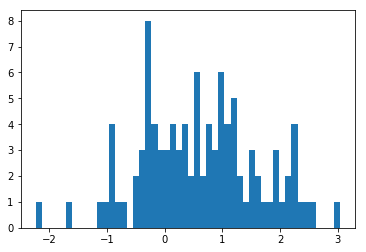

In [44]:
plt.hist(np.random.randn(100) + .66, bins = 50)